# 6.1 Classification 

## 6.1.1 Create a classification model using a logistic regression!

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
* Train a model that classifies the type of flower using (i) 2 features (sepal length and width) and (ii) all 4 features! Create a testing dataset of 25% for validation!
* Visualize the model!
* Create a confusion matrix!
* Compute precision and recall for every class in your model!

In [1]:
%matplotlib inline
import os, sys
from sklearn import linear_model, datasets
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression as sklearn_LogisticRegression
from sklearn.manifold import TSNE

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df["target_name"]=iris['target_names'][iris_df['target']] 
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
iris_df.target_name

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target_name, Length: 150, dtype: object

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:,0:2], iris_df.target, test_size=0.25, random_state=42)
lr_two_variables = sklearn_LogisticRegression()

In [5]:
%%time
lr_two_variables.fit(X_train, y_train)

CPU times: user 28.8 ms, sys: 4.16 ms, total: 32.9 ms
Wall time: 33 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
prediction_two_variables = lr_two_variables.predict(X_test)

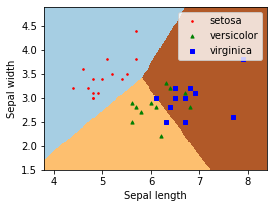

In [7]:
#inspired by: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
x_min, x_max = iris_df.iloc[:, 0].min() - .5, iris_df.iloc[:, 0].max() + .5
y_min, y_max = iris_df.iloc[:, 1].min() - .5, iris_df.iloc[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr_two_variables.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.scatter(X_test[y_test==0].iloc[:,0], X_test[y_test==0].iloc[:,1], s=10, c='r', marker=".", label='setosa')
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], s=10, c='g', marker="^", label='versicolor')
plt.scatter(X_test[y_test==2].iloc[:,0], X_test[y_test==2].iloc[:,1], s=10, c='b', marker="s", label='virginica')
plt.legend(loc='upper right');
plt.show()

In [8]:
confusion_matrix(prediction_two_variables, y_test)

array([[15,  0,  0],
       [ 0,  7,  2],
       [ 0,  4, 10]])

In [9]:
m = classification_report(prediction_two_variables, y_test, output_dict=True)
precisions_two_variables = {x: m[str(x)]['precision'] for x in range(3)}
recalls_two_variables = {x:m[str(x)]['recall'] for x in range(3)}

In [10]:
precisions_two_variables

{0: 1.0, 1: 0.6363636363636364, 2: 0.8333333333333334}

In [11]:
recalls_two_variables

{0: 1.0, 1: 0.7777777777777778, 2: 0.7142857142857143}

In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:,0:4], iris_df.target, test_size=0.25, random_state=42)
lr_four_variables = sklearn_LogisticRegression(max_iter=200)

In [13]:
%%time
lr_four_variables.fit(X_train, y_train)

CPU times: user 43.6 ms, sys: 8.5 ms, total: 52.1 ms
Wall time: 43.7 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
prediction_four_variables = lr_four_variables.predict(X_test)

In [83]:
tsne = TSNE(perplexity=20, learning_rate=10, n_iter=3000)
output = tsne.fit_transform(X_test.iloc[:,:4])

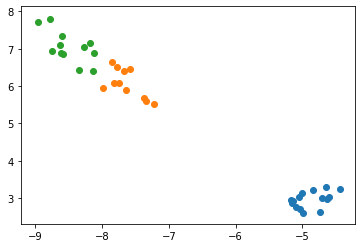

In [84]:
plt.scatter(output.T[0][y_test==0], output.T[1][y_test==0])
plt.scatter(output.T[0][y_test==1], output.T[1][y_test==1])
plt.scatter(output.T[0][y_test==2], output.T[1][y_test==2])

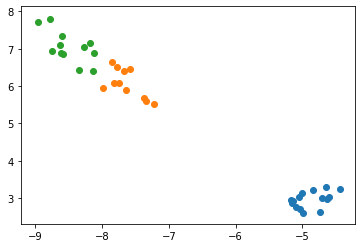

In [85]:
plt.scatter(output.T[0][prediction_four_variables==0], output.T[1][prediction_four_variables==0])
plt.scatter(output.T[0][prediction_four_variables==1], output.T[1][prediction_four_variables==1])
plt.scatter(output.T[0][prediction_four_variables==2], output.T[1][prediction_four_variables==2])

In [18]:
confusion_matrix(prediction_four_variables, y_test)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [19]:
m = classification_report(prediction_four_variables, y_test, output_dict=True)
precisions_four_variables = {x: m[str(x)]['precision'] for x in range(3)}
recalls_four_variables = {x:m[str(x)]['recall'] for x in range(3)}

In [20]:
precisions_four_variables

{0: 1.0, 1: 1.0, 2: 1.0}

In [21]:
recalls_four_variables

{0: 1.0, 1: 1.0, 2: 1.0}

## 6.1.2 Spark

* Using Spark MLlib to create a Logistic Regression!
    * https://spark.apache.org/docs/latest/ml-classification-regression.html
    * <https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.classification.LogisticRegression>
    
* Measure the training time. Compare the training time with the scikit-learn implementation! Explain! 

In [3]:
# Initialize PySpark
import os, sys
APP_NAME = "PySpark Lecture"
SPARK_MASTER="local[16]"
import pyspark
import pyspark.sql
from pyspark.sql import Row
from pyspark.ml.classification import LogisticRegression as spark_LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
conf=pyspark.SparkConf()
conf=pyspark.SparkConf().setAppName(APP_NAME).set("spark.local.dir", os.path.join(os.getcwd(), "tmp"))
sc = pyspark.SparkContext(master=SPARK_MASTER, conf=conf)
spark = pyspark.sql.SparkSession(sc).builder.appName(APP_NAME).getOrCreate()

print("PySpark initiated...")

PySpark initiated...


In [4]:
spark_iris_df = spark.createDataFrame(iris_df)
spark_iris_df = spark_iris_df.withColumnRenamed("target","label")
vecAssembler = VectorAssembler(inputCols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], outputCol = 'features')
vectorised_spark_iris_df = vecAssembler.transform(spark_iris_df)
vectorised_spark_iris_df = vectorised_spark_iris_df.select(['features', 'label'])
vectorised_spark_iris_df.show(3)

+-----------------+-----+
|         features|label|
+-----------------+-----+
|[5.1,3.5,1.4,0.2]|    0|
|[4.9,3.0,1.4,0.2]|    0|
|[4.7,3.2,1.3,0.2]|    0|
+-----------------+-----+
only showing top 3 rows



In [9]:
spark_lr = spark_LogisticRegression(maxIter=200)

In [10]:
spark_iris_df_train, spark_iris_df_test = vectorised_spark_iris_df.randomSplit([0.75, 0.25], seed=1337)

In [11]:
spark_iris_df_train.collect()

[Row(features=DenseVector([4.4, 2.9, 1.4, 0.2]), label=0),
 Row(features=DenseVector([4.6, 3.1, 1.5, 0.2]), label=0),
 Row(features=DenseVector([4.7, 3.2, 1.3, 0.2]), label=0),
 Row(features=DenseVector([4.9, 3.0, 1.4, 0.2]), label=0),
 Row(features=DenseVector([5.0, 3.4, 1.5, 0.2]), label=0),
 Row(features=DenseVector([5.0, 3.6, 1.4, 0.2]), label=0),
 Row(features=DenseVector([4.8, 3.0, 1.4, 0.1]), label=0),
 Row(features=DenseVector([4.9, 3.1, 1.5, 0.1]), label=0),
 Row(features=DenseVector([5.4, 3.7, 1.5, 0.2]), label=0),
 Row(features=DenseVector([5.8, 4.0, 1.2, 0.2]), label=0),
 Row(features=DenseVector([4.6, 3.6, 1.0, 0.2]), label=0),
 Row(features=DenseVector([5.0, 3.0, 1.6, 0.2]), label=0),
 Row(features=DenseVector([5.0, 3.4, 1.6, 0.4]), label=0),
 Row(features=DenseVector([5.1, 3.3, 1.7, 0.5]), label=0),
 Row(features=DenseVector([5.1, 3.7, 1.5, 0.4]), label=0),
 Row(features=DenseVector([5.1, 3.8, 1.5, 0.3]), label=0),
 Row(features=DenseVector([4.7, 3.2, 1.6, 0.2]), label=0

In [12]:
%%time
spark_lr_model = spark_lr.fit(spark_iris_df_train)

CPU times: user 124 ms, sys: 90.3 ms, total: 215 ms
Wall time: 8.12 s


### Explanation

sklearn is a lighter framework and on such small dataset it's faster than Spark running on 16 cores.

In [14]:
spark_iris_df_test_results = spark_lr_model.evaluate(spark_iris_df_test)

In [15]:
spark_iris_df_test_results.predictions.show(50)

+-----------------+-----+--------------------+--------------------+----------+
|         features|label|       rawPrediction|         probability|prediction|
+-----------------+-----+--------------------+--------------------+----------+
|[4.6,3.4,1.4,0.3]|    0|[65.9256804357077...|[1.0,2.8503955077...|       0.0|
|[5.1,3.5,1.4,0.2]|    0|[67.4810830925943...|[1.0,1.8099416931...|       0.0|
|[5.4,3.9,1.7,0.4]|    0|[72.0039056006542...|[1.0,3.8837729867...|       0.0|
|[4.3,3.0,1.1,0.1]|    0|[61.4028579276478...|[1.0,1.3283602540...|       0.0|
|[4.8,3.4,1.6,0.2]|    0|[64.3555467863763...|[1.0,3.9960377742...|       0.0|
|[5.1,3.5,1.4,0.3]|    0|[65.1270298777360...|[1.0,2.8025504728...|       0.0|
|[5.4,3.9,1.3,0.4]|    0|[76.1899170358441...|[1.0,4.1760678153...|       0.0|
|[5.7,4.4,1.5,0.4]|    0|[90.2466511409334...|[1.0,4.9224395783...|       0.0|
|[4.8,3.4,1.9,0.2]|    0|[61.2160382099838...|[1.0,1.1967248397...|       0.0|
|[5.4,3.4,1.7,0.2]|    0|[57.8155004877945...|[1.0,1